# <font style="color:rgb(50,120,229)">Contrast Enhancement</font>
Many definitions of contrast exist in literature. Without going into the gory details, roughly speaking it is the difference in intensity between the brightest and darkest regions of a given image. Higher the difference, higher is the contrast. The maximum contrast of an image is also known as **Dynamic Range**. In an image with good contrast, objects are easily discernible.

One of the easiest ways to improve contrast of an image is Intensity Scaling

In this approach, a scale factor ( $\alpha$ ) is multiplied with intensity values of all the pixels. Given below is the code snippet to do the same. Intensity scaling is represented by the following equation 

 $$
 I_o = \alpha I
 $$


## <font style="color:rgb(50,120,229)">Code for Contrast Enhancement</font>

In the code below, we will apply the above mentioned formulas to get contrast enhanced images.

We will increase the contrast by 30%.

In [1]:
# Import libraries
import cv2
import numpy as np
from dataPath import DATA_PATH
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Read image
image = cv2.imread(DATA_PATH+"images/boy.jpg")

In [3]:
scalingFactor = 1/255.0

# Convert unsigned int to float
image = np.float32(image)
# Scale the values so that they lie between [0,1]
image = image * scalingFactor

In [4]:
#Convert back to unsigned int
image = image * (1.0/scalingFactor)
image = np.uint8(image)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


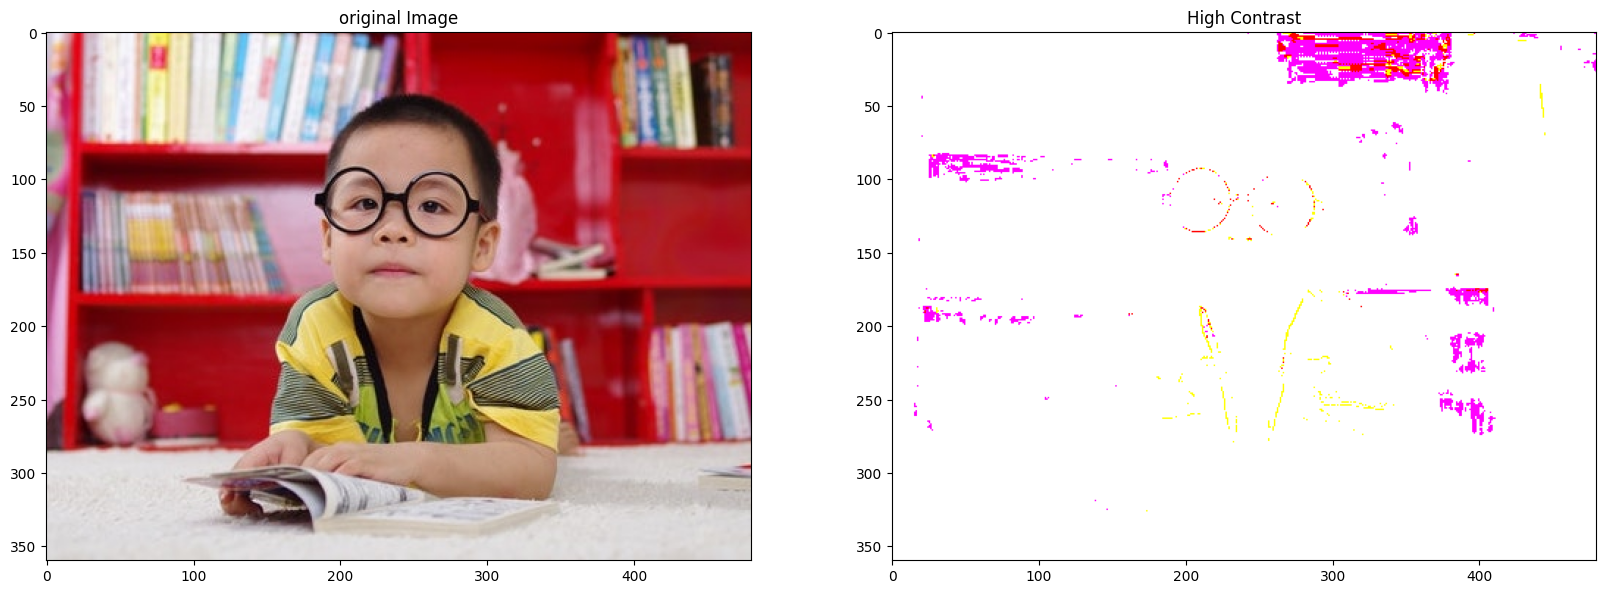

In [5]:
contrastPercentage = 30.0

# Multiply with scaling factor to increase contrast
contrastHigh = image * (1+contrastPercentage/100)

# Display the outputs
plt.figure(figsize=[20,20])
plt.subplot(121);plt.imshow(image[...,::-1]);plt.title("original Image");
plt.subplot(122);plt.imshow(contrastHigh[...,::-1]);plt.title("High Contrast");

## <font style="color:rgb(50,120,229)">What's wrong?</font>
Why did these simple operations gave such undesirable results? To answer that, let us do a quick check of the image properties.


In [6]:
print("Original Image Datatype : {}".format(image.dtype))
print("Contrast Image Datatype : {}".format(contrastHigh.dtype))

print("Original Image Highest Pixel Intensity : {}".format(image.max()))
print("Contrast Image Highest Pixel Intensity : {}".format(contrastHigh.max()))

Original Image Datatype : uint8
Contrast Image Datatype : float64
Original Image Highest Pixel Intensity : 255
Contrast Image Highest Pixel Intensity : 331.5


### <font style="color:rgb(8,133,37)">Issue with Contrast Enhancement code </font>
The white display in case of contrastHigh is more of a display issue. Display functions expect the images to be in either of these 2 formats:
1. If the image is in float datatype, then the range should be [0,1]. Anything above 255 is considered as white.
1. If the image is in int datatype, then the range should be [0,255]

### <font style="color:rgb(8,133,37)">Solution </font>
We can see that the datatype of contrastHigh is float and the max value is 331.5. This means that in order to get rid of this display problem, we can consider the above 2 points and make the image conform to any of the valid formats. So, to get rid of the problem, we can do the following:
1. **`Clip`** the intensity values to **`0 ~ 255`** and change the data type to **`uint8`**.
1. If you want to keep the image in float format, then **`Normalize`** the instensity values so that it lies in **`[0,1]`**

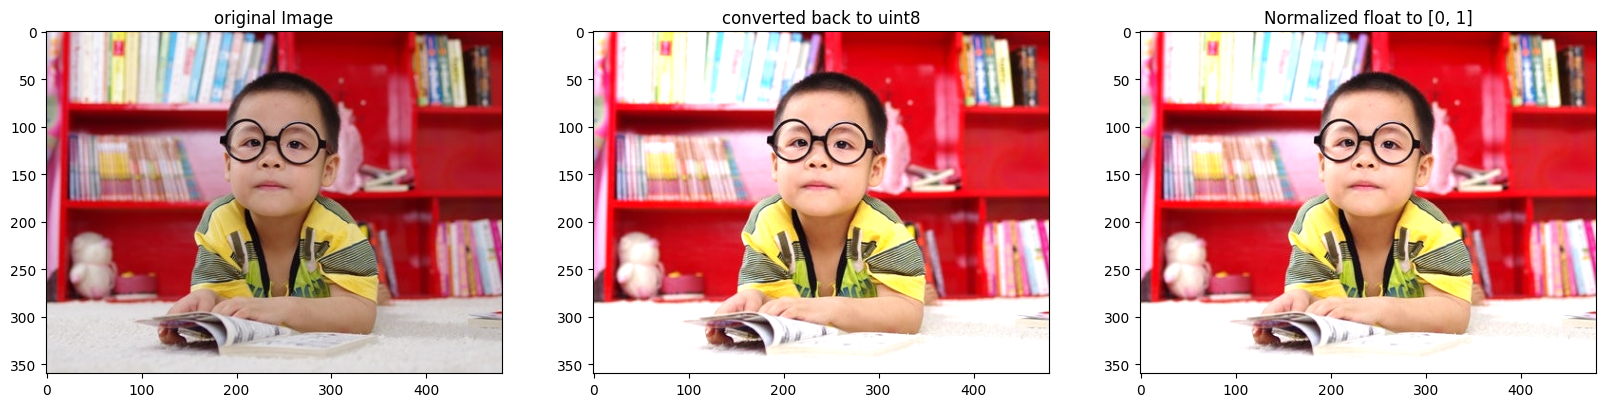

In [6]:
contrastPercentage = 30

# Clip the values to [0,255] and change it back to uint8 for display
contrastImage = image * (1+contrastPercentage/100)
clippedContrastImage = np.clip(contrastImage, 0, 255)
contrastHighClippedUint8 = np.uint8(clippedContrastImage)

# Convert the range to [0,1] and keep it in float format
contrastHighNormalized = (image * (1+contrastPercentage/100))/255
contrastHighNormalized01Clipped = np.clip(contrastHighNormalized,0,1)

plt.figure(figsize=[20,20])
plt.subplot(131);plt.imshow(image[...,::-1]);plt.title("original Image");
plt.subplot(132);plt.imshow(contrastHighClippedUint8[...,::-1]);plt.title("converted back to uint8");
plt.subplot(133);plt.imshow(contrastHighNormalized01Clipped[...,::-1]);plt.title("Normalized float to [0, 1]");
